# Grade Analysis of Students

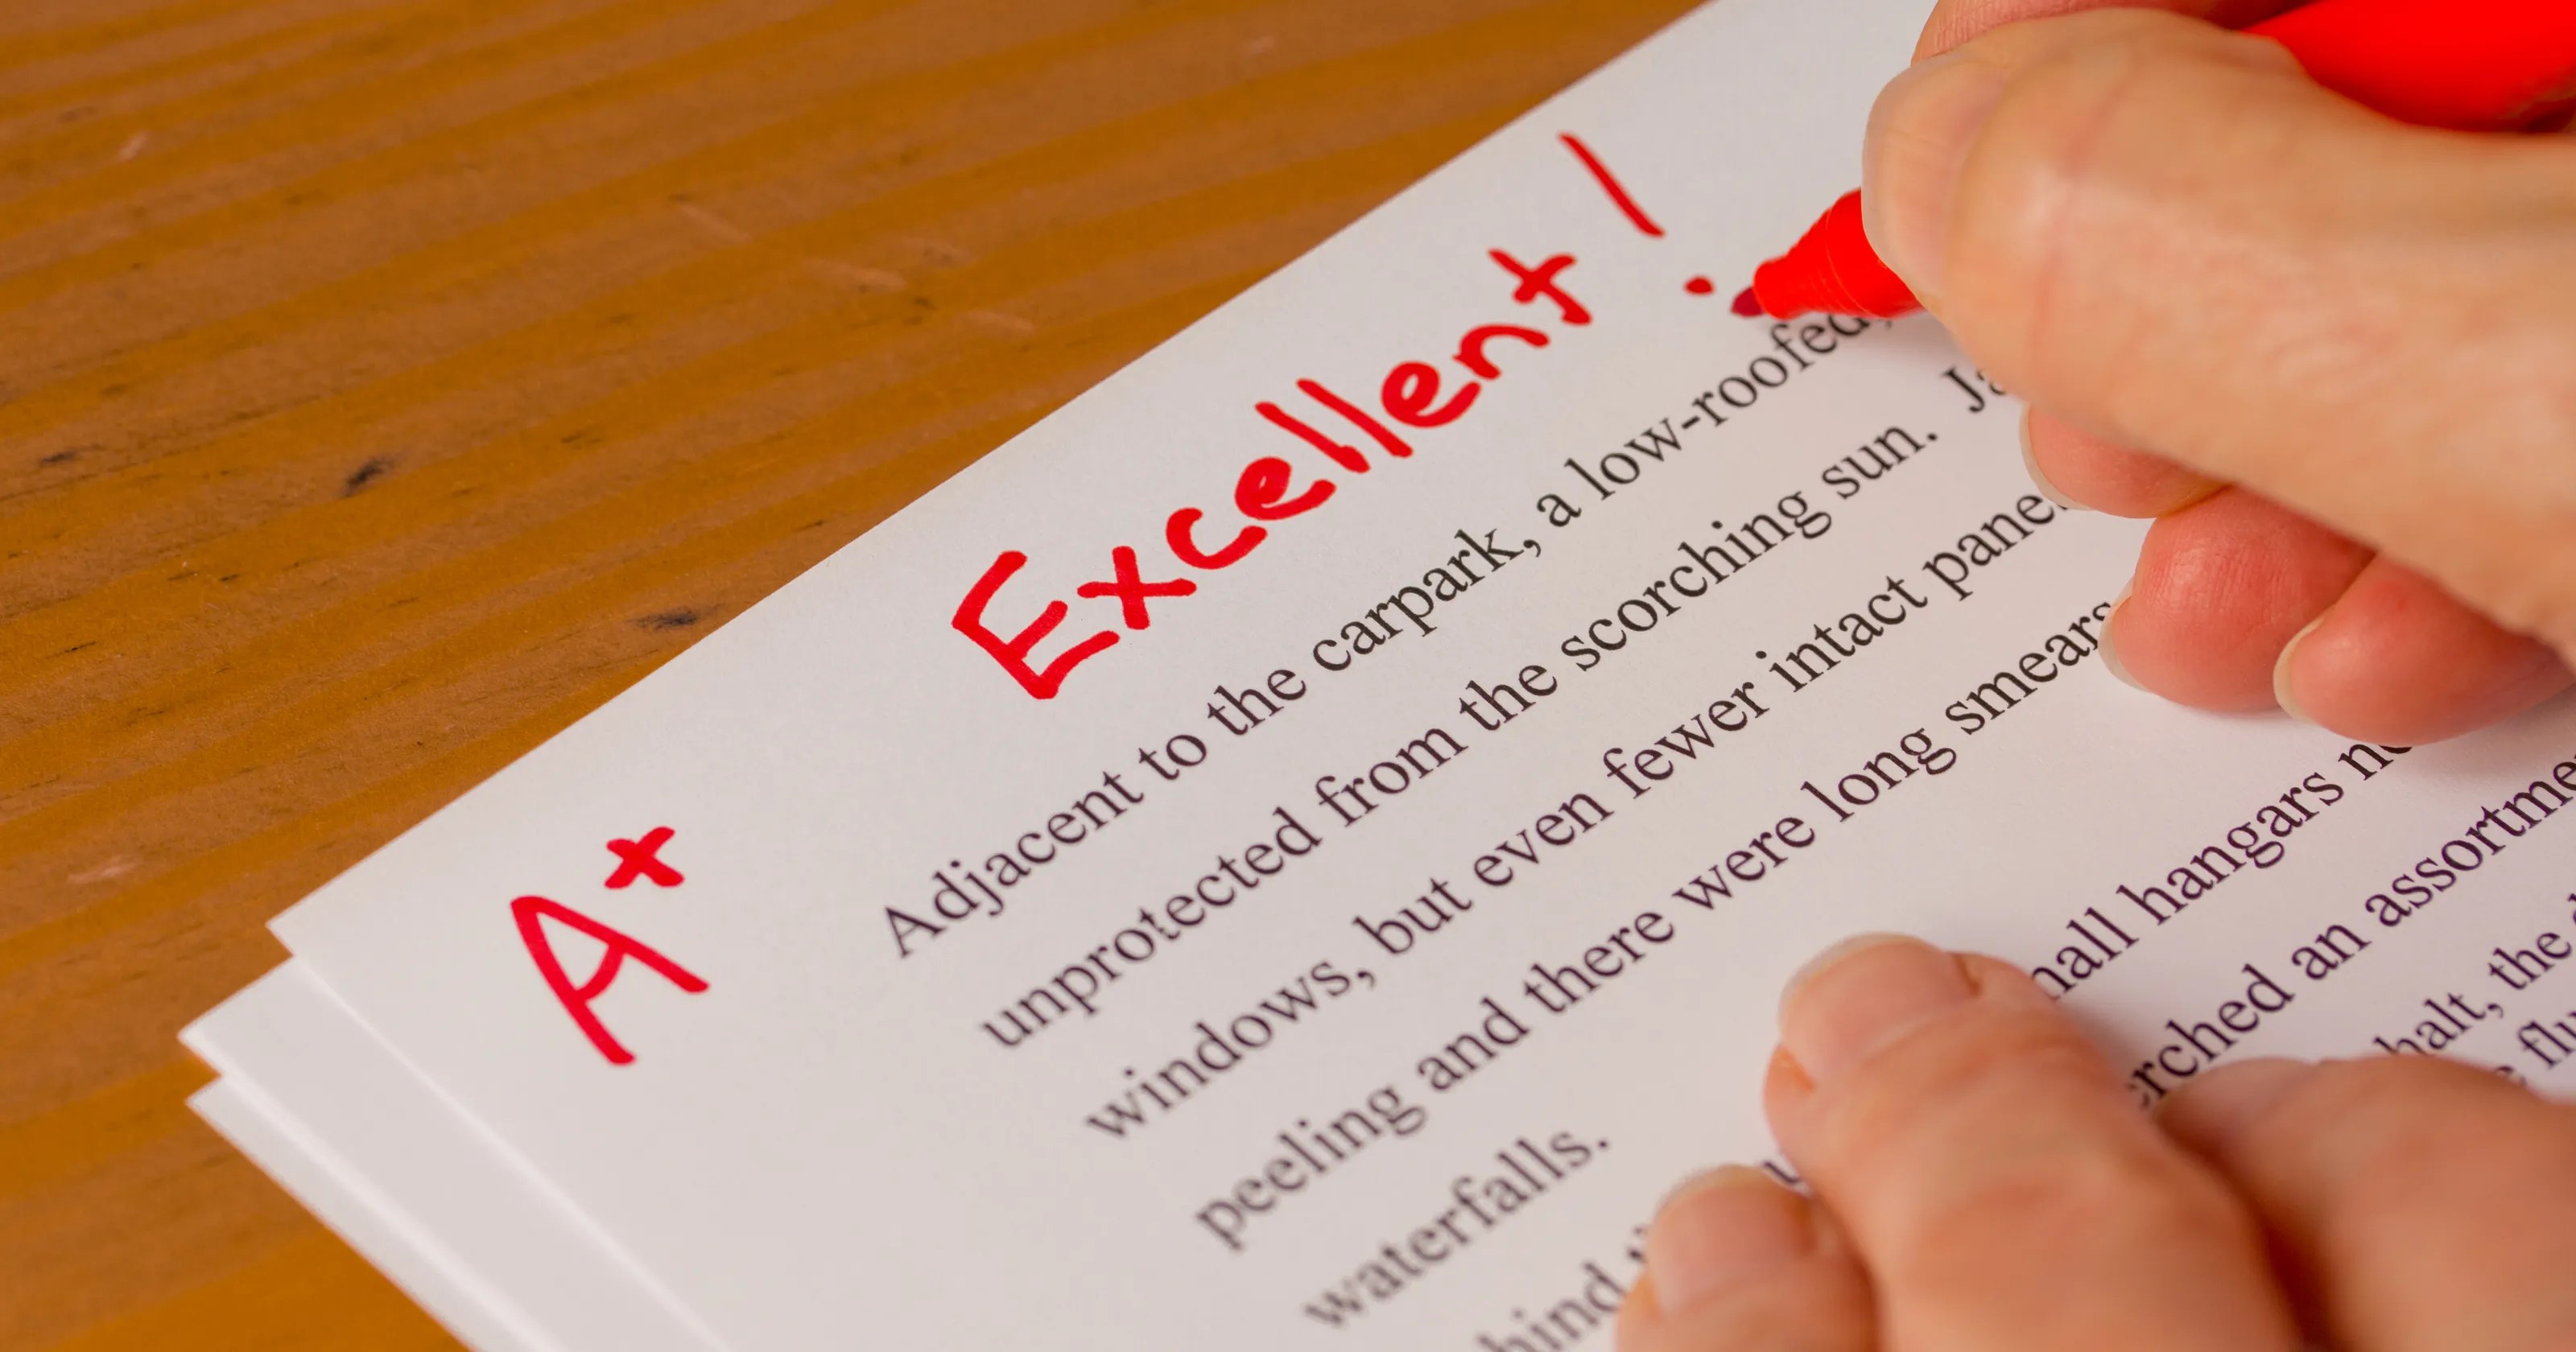

 1. Do grades have anything to do with student's gender?

 2. Younger students vs older students. Do older students perform better than younger ones?

3. Does parents education effects student final Grade?

4. Does Parents profession effects the student final grade?

In [197]:
#import necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder



In [27]:
df=pd.read_csv('/content/student-mat.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
df.shape

(395, 33)

In [6]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [7]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [17]:
labelencoder=LabelEncoder()

There are 33 columns in this data. These columns signify the following:

    school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 

    sex - student's sex (binary: 'F' - female or 'M' - male)

    age - student's age (numeric: from 15 to 22) 
 
    address - student's home address type (binary: 'U' - urban or 'R' - rural) 
 
    famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 
 
    Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 
 
    Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
 
    Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
  
    Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
   
    reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') 
    
    guardian - student's guardian (nominal: 'mother', 'father' or 'other')
   
    traveltime - home to school travel time (numeric: 1 - 1 hour) studytime - weekly study time (numeric: 1 - 10 hours)
   
    failures - number of past class failures (numeric: n if 1<=n<3, else 4) 
    
    schoolsup - extra educational support (binary: yes or no)
    
     famsup - family educational support (binary: yes or no) 
     
     paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 
     
     activities - extra-curricular activities (binary: yes or no) 
     
     nursery - attended nursery school (binary: yes or no)
     
      higher - wants to take higher education (binary: yes or no)
      
       internet - Internet access at home (binary: yes or no) 
     
     romantic - with a romantic relationship (binary: yes or no) 
     
     famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 
     
     freetime - free time after school (numeric: from 1 - very low to 5 - very high) 
     
     goout - going out with friends (numeric: from 1 - very low to 5 - very high) 
     
     Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
     
      Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
     
      health - current health status (numeric: from 1 - very bad to 5 - very good) 
     
     absences - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:

    G1 - first period grade (numeric: from 0 to 20)
    
    G2 - second period grade (numeric: from 0 to 20) 

    G3 - final grade (numeric: from 0 to 20, output target)

In [50]:
df.school.nunique()

2

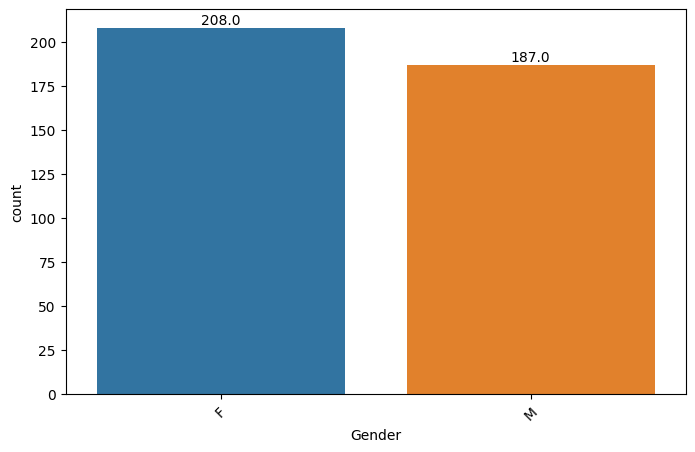

In [51]:
plt.figure(figsize=(8,5))

plot=sns.countplot(x='sex', data=df)
plt.xticks(rotation=90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')
plt.xticks(rotation=45)

plt.xlabel('Gender')

plt.show()


Distribution of age

Text(0.5, 0, 'Gender')

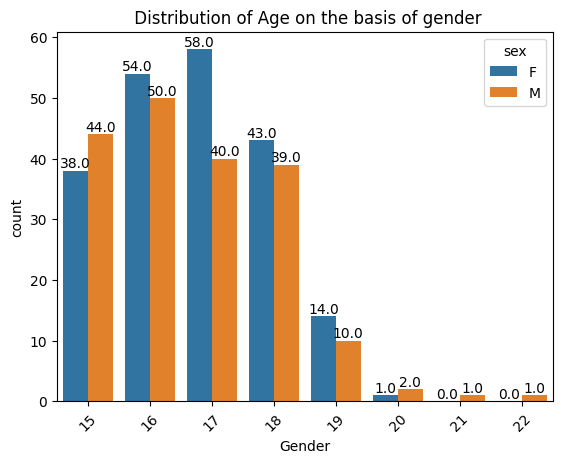

In [57]:

plot=sns.countplot(x='age', hue="sex", data=df)
plt.xticks(rotation=90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')
plt.xticks(rotation=45)
plt.title(" Distribution of Age on the basis of gender")

plt.xlabel('Gender')

##Distribution of FINAL GRADE(G3)  on the basis of School

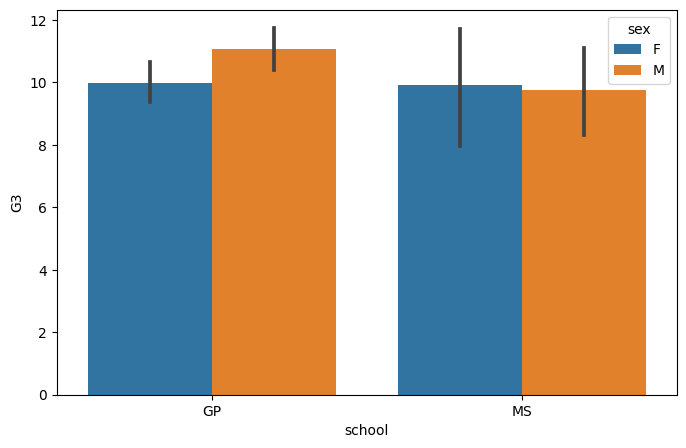

In [173]:
plt.figure(figsize=(8,5))
plot=sns.barplot(x="school", y="G3" , hue='sex' ,data=df)
plt.show()


1st question
## Distribution of Grade on the basis of gender

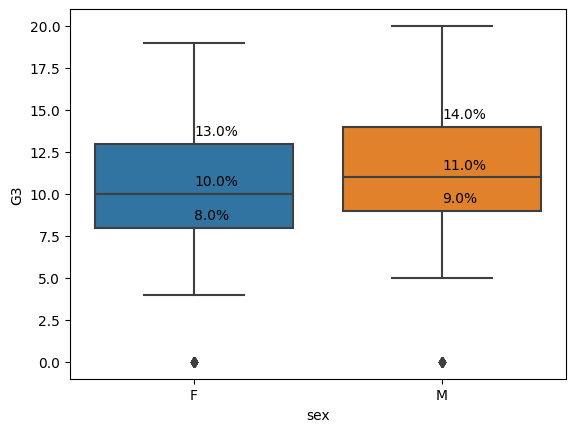

In [174]:
g=sns.boxplot(x='sex',y='G3', data=df)

box_data = df.groupby("sex")["G3"].describe(percentiles=[0.25, 0.5, 0.75])

# Add percentage labels on top of each box
for i, box in enumerate(box_data.index):
    q1 = box_data.loc[box, "25%"]
    q2 = box_data.loc[box, "50%"]
    q3 = box_data.loc[box, "75%"]
    plt.text(i, q3 + 0.5, f'{q3}%')
    plt.text(i, q2 + 0.5, f'{q2}%')
    plt.text(i, q1 + 0.5, f'{q1}%')
plt.show()

##Distribution of FINAL GRADE(G2) on the basis of School

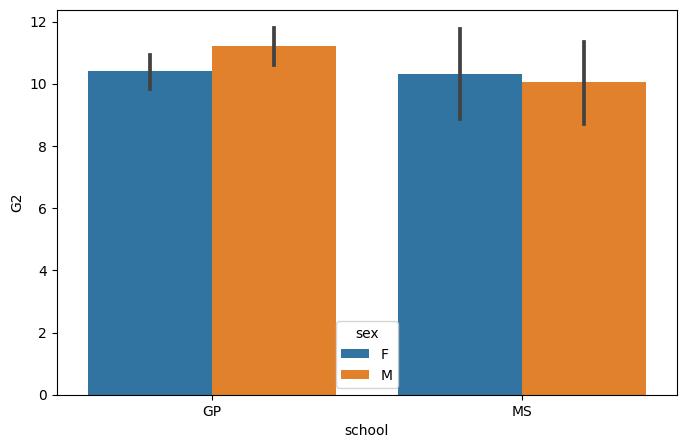

In [45]:
plt.figure(figsize=(8,5))
plot=sns.barplot(x="school", y="G2" , hue='sex' ,data=df)
plt.show()

##Distribution of Final Grade(G3) on the basis of age

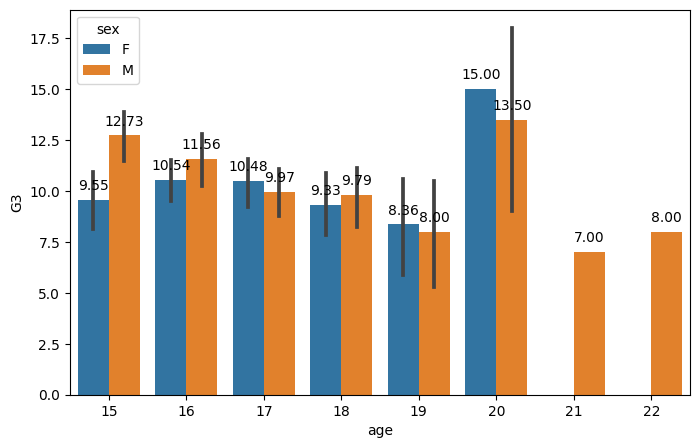

In [77]:
plt.figure(figsize=(8,5))
plot = sns.barplot(x="age", y="G3", hue='sex', data=df)

# Add count labels on top of each bar with 2 digits after decimal point
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x() + p.get_width() / 2, height + 0.5, f'{height:.2f}', ha="center")

plt.show()



As  we  can see that age of 20 scores more than younger students

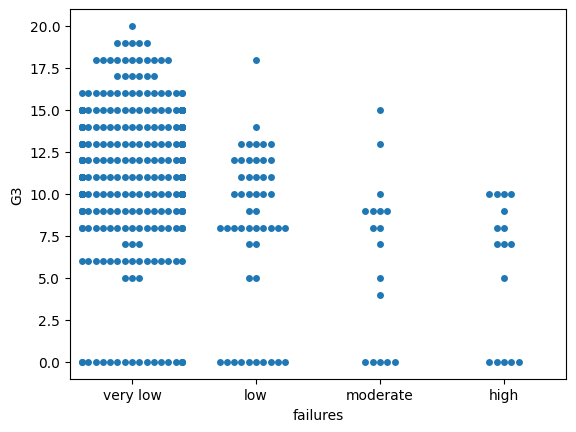

In [80]:
#failures vs final score
g=sns.swarmplot(x='failures',y='G3',data=df)
g.set(xticklabels=['very low','low','moderate','high','very high'])
plt.show()

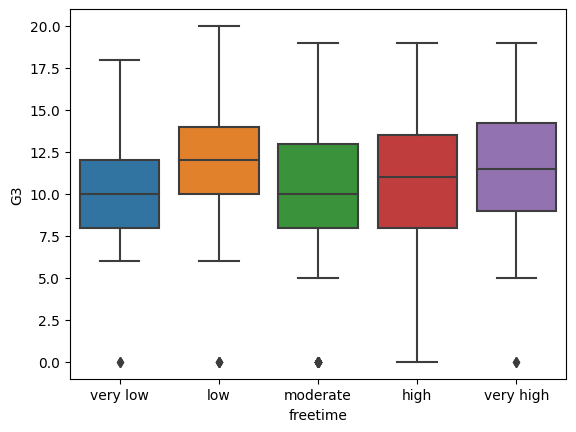

In [81]:
#freetime vs final Score
g=sns.boxplot(x='freetime',y='G3',data=df)
g.set(xticklabels=['very low','low','moderate','high','very high'])
plt.show()

## Distribution of grade by father's education

<Axes: xlabel='Fedu', ylabel='G3'>

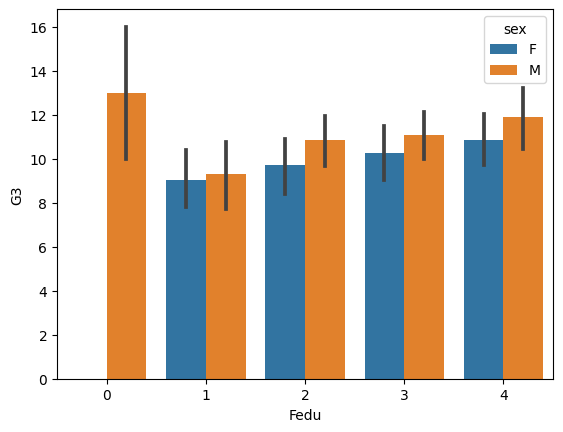

In [146]:
sns.barplot(x='Fedu', y='G3',hue='sex', data=df)


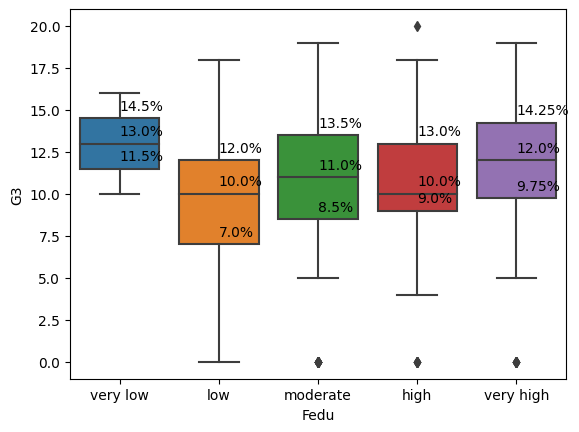

In [145]:
g=sns.boxplot(x='Fedu',y='G3', data=df)

box_data = df.groupby("Fedu")["G3"].describe(percentiles=[0.25, 0.5, 0.75])

# Add percentage labels on top of each box
for i, box in enumerate(box_data.index):
    q1 = box_data.loc[box, "25%"]
    q2 = box_data.loc[box, "50%"]
    q3 = box_data.loc[box, "75%"]
    plt.text(i, q3 + 0.5, f'{q3}%')
    plt.text(i, q2 + 0.5, f'{q2}%')
    plt.text(i, q1 + 0.5, f'{q1}%')

g.set(xticklabels=['very low', 'low','moderate','high','very high'])
plt.show()

In [107]:

df.Medu.nunique()

5

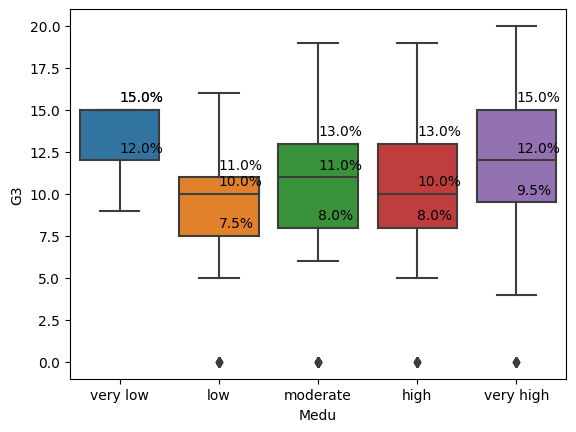

In [144]:
g=sns.boxplot(x='Medu',y='G3', data=df)

box_data = df.groupby("Medu")["G3"].describe(percentiles=[0.25, 0.5, 0.75])

# Add percentage labels on top of each box
for i, box in enumerate(box_data.index):
    q1 = box_data.loc[box, "25%"]
    q2 = box_data.loc[box, "50%"]
    q3 = box_data.loc[box, "75%"]
    plt.text(i, q3 + 0.5, f'{q3}%')
    plt.text(i, q2 + 0.5, f'{q2}%')
    plt.text(i, q1 + 0.5, f'{q1}%')

g.set(xticklabels=['very low', 'low','moderate','high','very high'])
plt.show()

In [110]:
df.famsize.nunique()

2

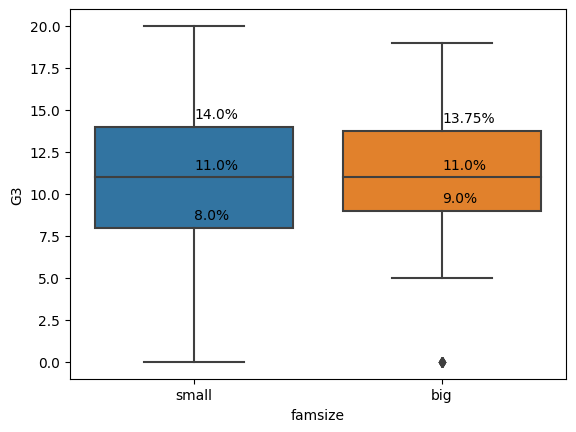

In [143]:
g=sns.boxplot(x='famsize',y='G3', data=df)

box_data = df.groupby("famsize")["G3"].describe(percentiles=[0.25, 0.5, 0.75])

# Add percentage labels on top of each box
for i, box in enumerate(box_data.index):
    q1 = box_data.loc[box, "25%"]
    q2 = box_data.loc[box, "50%"]
    q3 = box_data.loc[box, "75%"]
    plt.text(i, q3 + 0.5, f'{q3}%')
    plt.text(i, q2 + 0.5, f'{q2}%')
    plt.text(i, q1 + 0.5, f'{q1}%')

g.set(xticklabels=['small', 'big'])
plt.show()

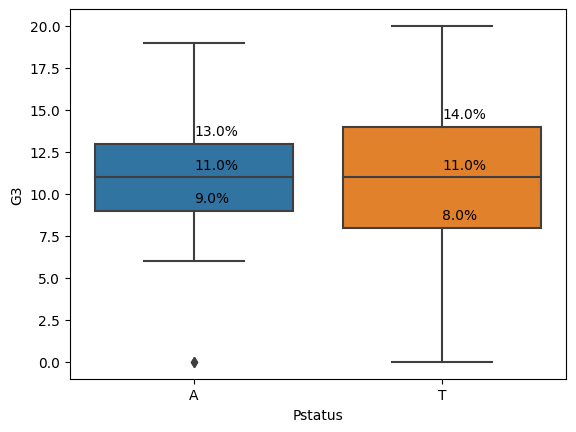

In [142]:
g=sns.boxplot(x='Pstatus',y='G3', data=df)

box_data = df.groupby("Pstatus")["G3"].describe(percentiles=[0.25, 0.5, 0.75])

# Add percentage labels on top of each box
for i, box in enumerate(box_data.index):
    q1 = box_data.loc[box, "25%"]
    q2 = box_data.loc[box, "50%"]
    q3 = box_data.loc[box, "75%"]
    plt.text(i, q3 + 0.5, f'{q3}%')
    plt.text(i, q2 + 0.5, f'{q2}%')
    plt.text(i, q1 + 0.5, f'{q1}%')

plt.show()

<Axes: xlabel='Mjob', ylabel='count'>

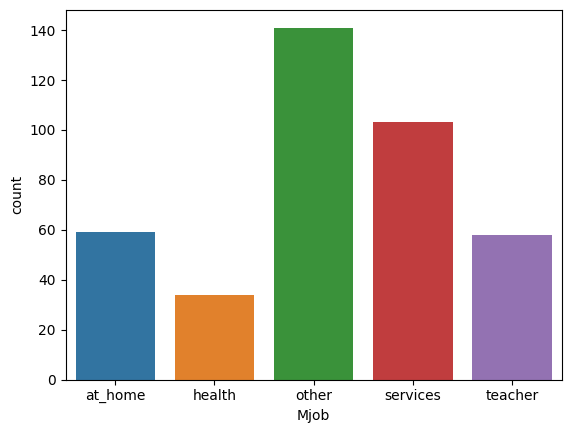

In [118]:
#mother's job plot
sns.countplot(x='Mjob',data=df)

### Distribution of Final Grade on the basis of Mother's job

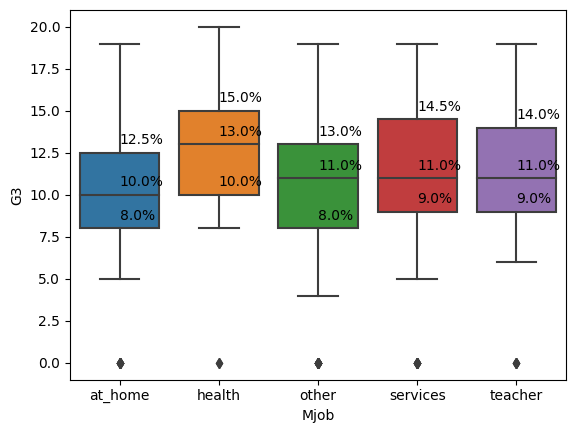

In [141]:
g=sns.boxplot(x='Mjob',y='G3', data=df)

box_data = df.groupby("Mjob")["G3"].describe(percentiles=[0.25, 0.5, 0.75])

# Add percentage labels on top of each box
for i, box in enumerate(box_data.index):
    q1 = box_data.loc[box, "25%"]
    q2 = box_data.loc[box, "50%"]
    q3 = box_data.loc[box, "75%"]
    plt.text(i, q3 + 0.5, f'{q3}%')
    plt.text(i, q2 + 0.5, f'{q2}%')
    plt.text(i, q1 + 0.5, f'{q1}%')

plt.show()

### Dirstribution of Final Grade on the basis of Father's job

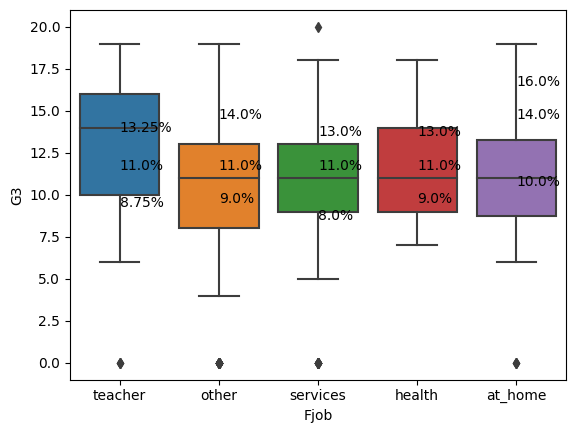

In [140]:
g=sns.boxplot(x='Fjob',y='G3', data=df)

box_data = df.groupby("Fjob")["G3"].describe(percentiles=[0.25, 0.5, 0.75])

# Add percentage labels on top of each box
for i, box in enumerate(box_data.index):
    q1 = box_data.loc[box, "25%"]
    q2 = box_data.loc[box, "50%"]
    q3 = box_data.loc[box, "75%"]
    plt.text(i, q3 + 0.5, f'{q3}%')
    plt.text(i, q2 + 0.5, f'{q2}%')
    plt.text(i, q1 + 0.5, f'{q1}%')

plt.show()

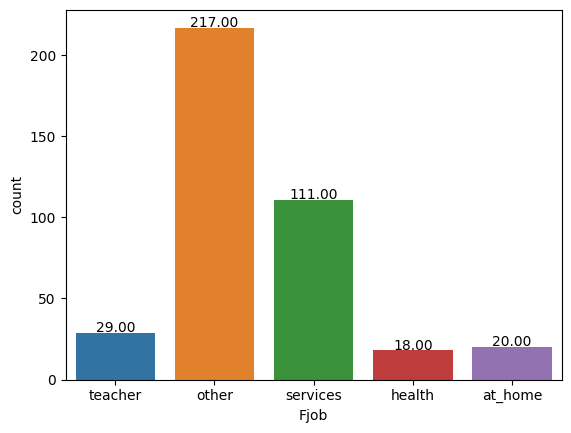

In [124]:
#father's job plot
plot=sns.countplot(x='Fjob',data=df)
for p in plot.patches:
    height = p.get_height()
    plot.text(p.get_x() + p.get_width() / 2, height + 0.5, f'{height:.2f}', ha="center")

plt.show()


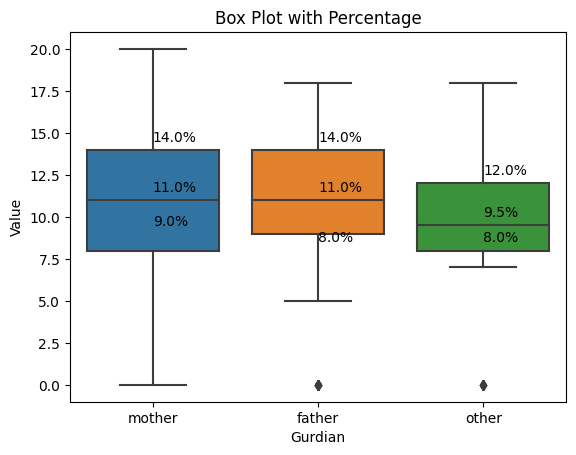

In [133]:



sns.boxplot(x="guardian", y="G3", data=df)


box_data = df.groupby("guardian")["G3"].describe(percentiles=[0.25, 0.5, 0.75])


for i, box in enumerate(box_data.index):
    q1 = box_data.loc[box, "25%"]
    q2 = box_data.loc[box, "50%"]
    q3 = box_data.loc[box, "75%"]
    plt.text(i, q3 + 0.5, f'{q3}%')
    plt.text(i, q2 + 0.5, f'{q2}%')
    plt.text(i, q1 + 0.5, f'{q1}%')

# Add labels and title
plt.xlabel("Gurdian")
plt.ylabel("Value")
plt.title("Box Plot with Percentage")

# Display the plot
plt.show()


##  Grade distribution on the basis of Family relationship

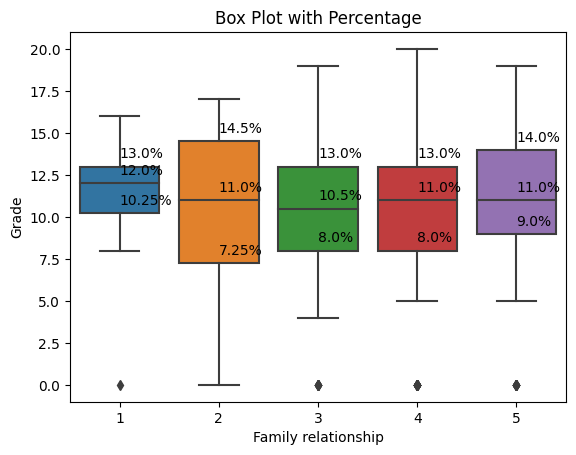

In [132]:


sns.boxplot(x="famrel", y="G3", data=df)


box_data = df.groupby("famrel")["G3"].describe(percentiles=[0.25, 0.5, 0.75])

# Add percentage labels on top of each box
for i, box in enumerate(box_data.index):
    q1 = box_data.loc[box, "25%"]
    q2 = box_data.loc[box, "50%"]
    q3 = box_data.loc[box, "75%"]
    plt.text(i, q3 + 0.5, f'{q3}%')
    plt.text(i, q2 + 0.5, f'{q2}%')
    plt.text(i, q1 + 0.5, f'{q1}%')

# Add labels and title
plt.xlabel("Family relationship")
plt.ylabel("Grade")
plt.title("Box Plot with Percentage")

# Display the plot
plt.show()


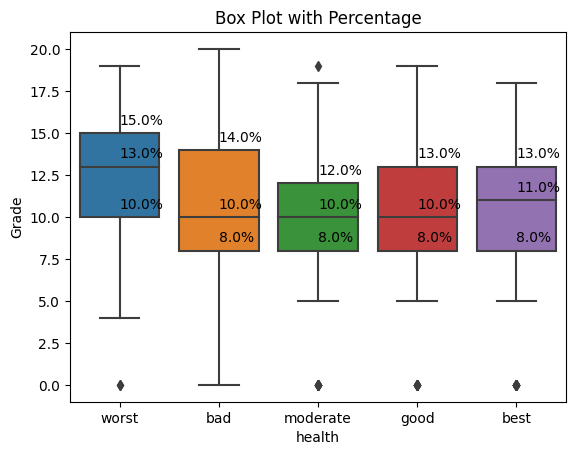

In [139]:



sns.boxplot(x="health", y="G3", data=df)


box_data = df.groupby("health")["G3"].describe(percentiles=[0.25, 0.5, 0.75])


for i, box in enumerate(box_data.index):
    q1 = box_data.loc[box, "25%"]
    q2 = box_data.loc[box, "50%"]
    q3 = box_data.loc[box, "75%"]
    plt.text(i, q3 + 0.5, f'{q3}%')
    plt.text(i, q2 + 0.5, f'{q2}%')
    plt.text(i, q1 + 0.5, f'{q1}%')

# Add labels and title
plt.xlabel("health")
plt.ylabel("Grade")
plt.title("Box Plot with Percentage")
plt.xticks([0,1, 2, 3, 4], ["worst", "bad", "moderate", "good", "best"])

# Add labels and title

# Display the plot
plt.show()


<Axes: xlabel='age', ylabel='G3'>

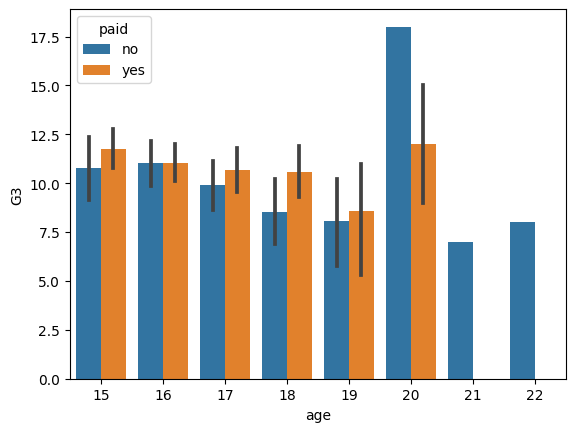

In [147]:
#countplot of age vs final score based on being paid
sns.barplot(x='age',y='G3',data=df,hue='paid')

<Axes: xlabel='age', ylabel='G3'>

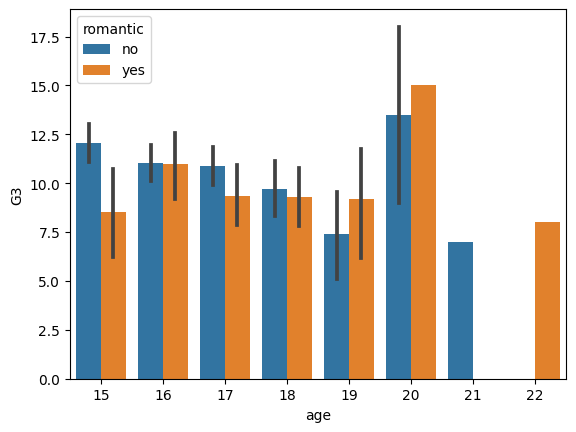

In [148]:
#age vs final score based on romantic life
sns.barplot(x='age',y='G3',hue='romantic',data=df)

wow::::: !!! Students with romantic relationships score less than those without relationships, with age of 20 being an exception😮. 

The students mature by 20 and handle both the things well:.

<Axes: xlabel='age', ylabel='goout'>

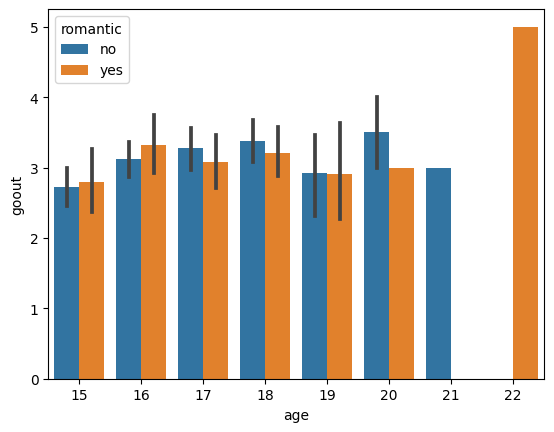

In [150]:
#age vs gout based on romantic life
sns.barplot(x='age',y='goout',hue='romantic',data=df)

age of 22  which are on relationsip are mostly likely to going out

# 😮

<Axes: xlabel='goout', ylabel='G3'>

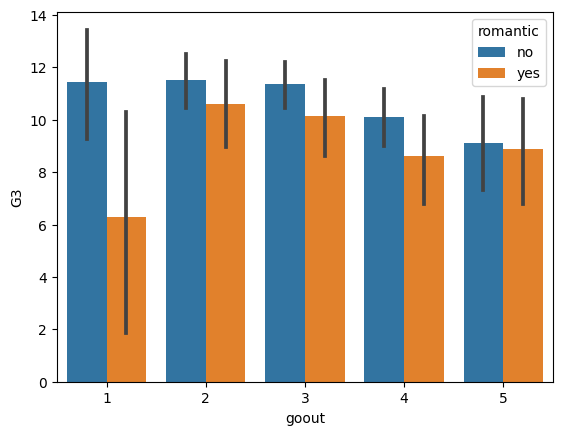

In [152]:
#goout vs final score based on romantic life
sns.barplot(x='goout',y='G3',hue='romantic',data=df)

<Axes: xlabel='absences', ylabel='count'>

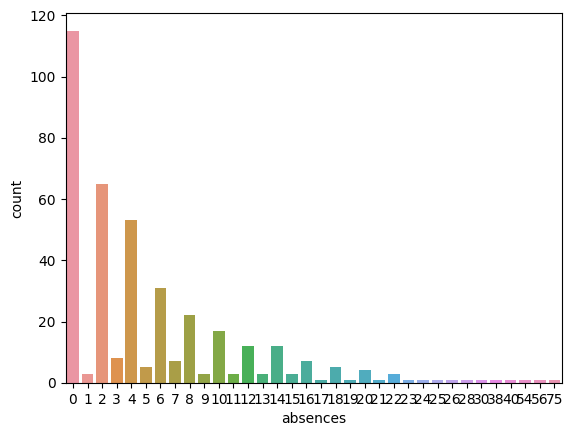

In [158]:
sns.countplot(x='absences',data=df)

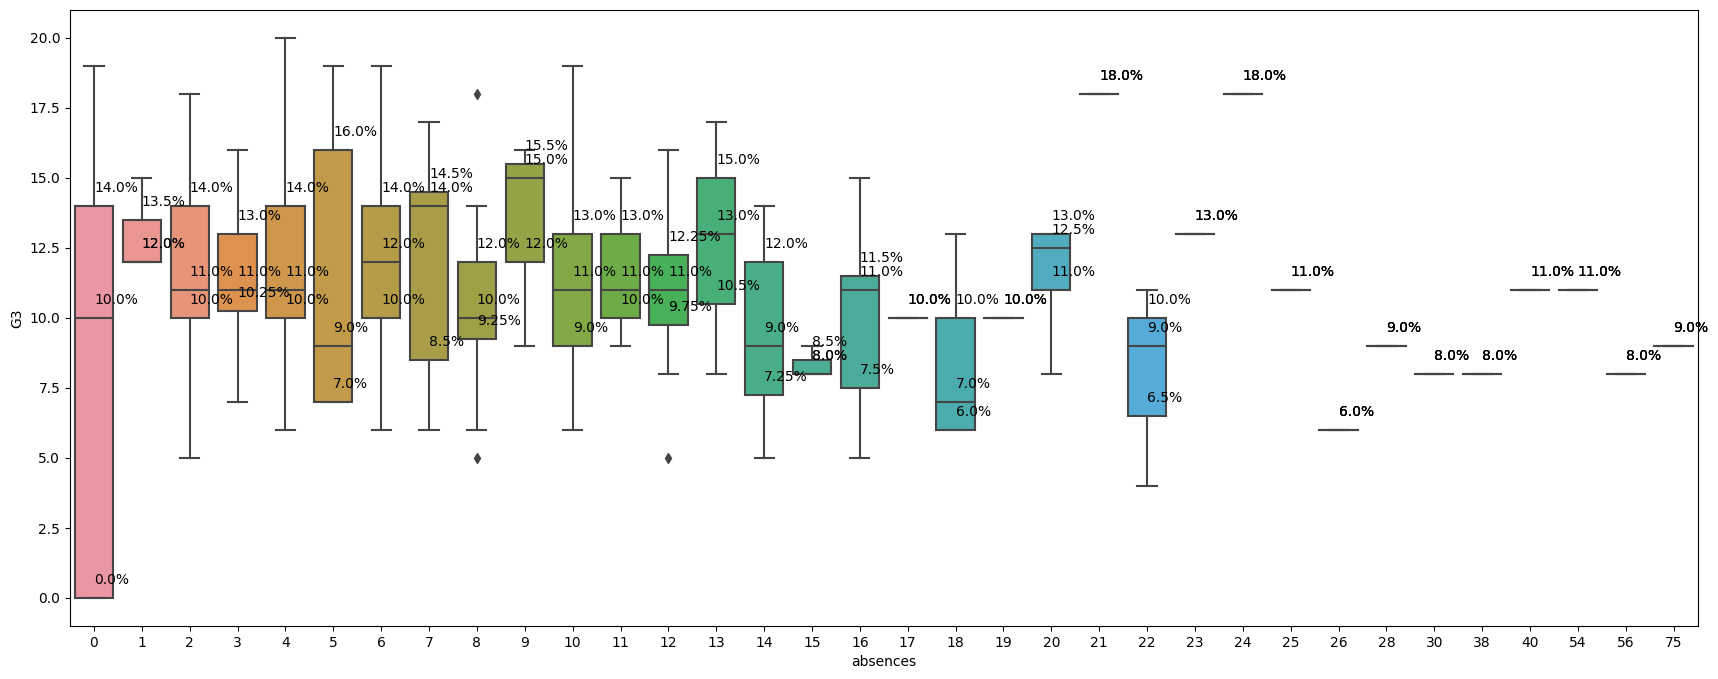

In [163]:
#absences vs final score based on gender
plt.figure(figsize=(21,8))
sns.boxplot(x="absences", y="G3", data=df)


box_data = df.groupby("absences")["G3"].describe(percentiles=[0.25, 0.5, 0.75])


for i, box in enumerate(box_data.index):
    q1 = box_data.loc[box, "25%"]
    q2 = box_data.loc[box, "50%"]
    q3 = box_data.loc[box, "75%"]
    plt.text(i, q3 + 0.5, f'{q3}%')
    plt.text(i, q2 + 0.5, f'{q2}%')
    plt.text(i, q1 + 0.5, f'{q1}%')
plt.show()

In [164]:
# we can see that student with 0 absences scores 14 and while the student with more absences scores about 18%

In [175]:
#finding the correlation

In [176]:
df_model=df.copy()

In [177]:
df_corr=df_model.corr()

In [178]:
df_corr

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


<Axes: >

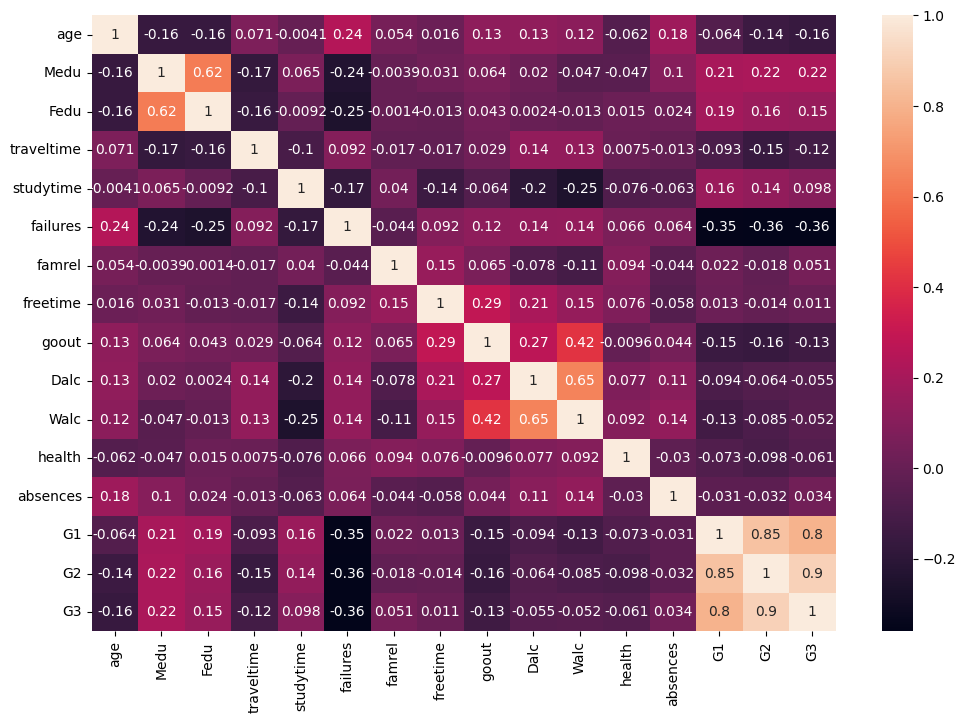

In [181]:

plt.figure(figsize=(12,8))
sns.heatmap(df_corr,annot=True)

In [182]:
#now finding the  top factors for high grade using this confusion matrix

In [185]:
high_corr=df_corr['G3']
df_sort=high_corr.sort_values(ascending=False)

In [188]:
sorted_values=df_sort[:10]

In [189]:

print(f'top factors for high grades are :')
print(sorted_values)
     

top factors for high grades are :
G3           1.000000
G2           0.904868
G1           0.801468
Medu         0.217147
Fedu         0.152457
studytime    0.097820
famrel       0.051363
absences     0.034247
freetime     0.011307
Walc        -0.051939
Name: G3, dtype: float64


In [191]:
df_model=df_model.drop(['G3'],axis=1)

In [192]:
df_model

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,5,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,5,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,7,8
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,5,5,4,4,5,4,11,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,no,2,4,5,3,4,2,3,14,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,5,5,3,3,3,3,3,10,8
393,MS,M,18,R,LE3,T,3,2,services,other,...,no,4,4,1,3,4,5,0,11,12


In [193]:
#extracting major features only
df_features=df[['G1','G2','Medu','Fedu','studytime']]
df_features.head()
df_label=df[['G3']]

In [194]:
X=df_features.values
y=df_label.values

In [195]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [204]:
#performing the regression on various models and storing the scores
scores={}
def classifier():
    dict_models={
        'Linear Regression':LinearRegression(),
        'Support Vector Machine':SVR(kernel='linear',degree=1),
        'Decision Tree':DecisionTreeRegressor(criterion='squared_error'),
        'Random Forest':RandomForestRegressor(n_estimators=150,criterion='squared_error',verbose=0)
    }
    X_train.shape
    y_train.shape
    
    for key,value in dict_models.items():
        regression=value.fit(X_train,y_train)
        score=cross_val_score(regression,X,y,scoring='neg_mean_squared_error')
        score=np.sqrt(-score.mean())
        scores[key]=score
        print(
            f'Model Name: {key},RMSE score: {(score.mean())}')

In [205]:
classifier()

Model Name: Linear Regression,RMSE score: 1.9618580431363848
Model Name: Support Vector Machine,RMSE score: 2.0092046787061633
Model Name: Decision Tree,RMSE score: 2.7845010057305073
Model Name: Random Forest,RMSE score: 2.2268951278369995


In [206]:
#scaling the values(although it doesn't change the rmse)
from sklearn.preprocessing import MinMaxScaler
sc_s=MinMaxScaler()
X_train=sc_s.fit_transform(X_train)
X_test=sc_s.transform(X_test)

In [207]:
#labelling the categorical column values of the dataframe
for column in df.columns:
    if df[column].dtype=='object':
        df[column]=LabelEncoder().fit_transform(df[column])

In [208]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [209]:
new=RandomForestRegressor()
model=new.fit(X_train,y_train)
score=cross_val_score(model,X,y,scoring='neg_mean_squared_error')
score=np.sqrt(-score.mean())
scores['Random Forest Labled']=score

In [210]:
#Using Decision Tree Regressor
test=DecisionTreeRegressor()
model=new.fit(X_train,y_train)
score=cross_val_score(model,X,y,scoring='neg_mean_squared_error')
score=np.sqrt(-score.mean())
scores['Decision Tree Labled']=score

In [211]:
scores=(pd.Series(scores)).to_frame()

In [212]:
#renaming the column names
scores=scores.rename(columns={0:'RMSE Error'})
scores

,RMSE Error
Linear Regression,1.961858
Support Vector Machine,2.009205
Decision Tree,2.784501
Random Forest,2.226895
Random Forest Labled,1.797577
Decision Tree Labled,1.808971


<Axes: >

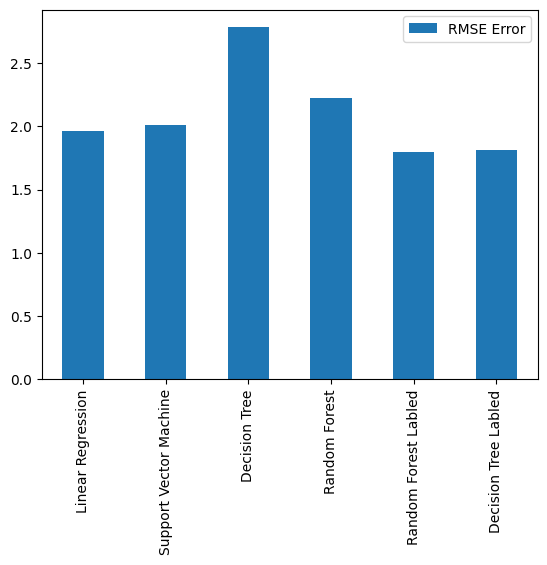

In [213]:
#plotting the scores of each model for better comparison
scores.plot(kind='bar')